Importing libraries 

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Reading the Data

In [2]:
missions_df = pd.read_csv("missions.csv", index_col = 0)
missions_df.head()

,ID,Company Name,Location,Date,Detail,Status Rocket,Cost,Status Mission
0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


Data Preprocessing

In [3]:
missions_df.shape

(4324, 8)

In [4]:
missions_df.columns

Index(['ID', 'Company Name', 'Location', 'Date', 'Detail', 'Status Rocket',
       ' Cost', 'Status Mission'],
      dtype='object')

In [5]:
missions_df.columns = missions_df.columns.str.strip()
missions_df.columns

Index(['ID', 'Company Name', 'Location', 'Date', 'Detail', 'Status Rocket',
       'Cost', 'Status Mission'],
      dtype='object')

In [6]:
missions_df.describe()

,ID
count,4324.000000
mean,2161.500000
std,1248.375611
min,0.000000
25%,1080.750000
50%,2161.500000
75%,3242.250000
max,4323.000000


In [7]:
missions_df.isna().sum()

ID                   0
Company Name         0
Location             0
Date                 0
Detail               0
Status Rocket        0
Cost              3360
Status Mission       0
dtype: int64

In [8]:
missions_df['Day'] = missions_df['Date'].apply(lambda x:x.split()[0])
missions_df['Month'] = missions_df['Date'].apply(lambda x:x.split()[1])
missions_df['DatE'] = missions_df['Date'].apply(lambda x:x.split()[2])
missions_df['Year'] = missions_df['Date'].apply(lambda x:x.split()[3])

In [9]:
missions_df.drop('Date', axis = 1).head()

,ID,Company Name,Location,Detail,Status Rocket,Cost,Status Mission,Day,Month,DatE,Year
0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,Fri,Aug,"07,",2020
1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,Thu,Aug,"06,",2020
2,2,SpaceX,"Pad A, Boca Chica, Texas, USA",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,Tue,Aug,"04,",2020
3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Thu,Jul,"30,",2020
4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",Atlas V 541 | Perseverance,StatusActive,145.0,Success,Thu,Jul,"30,",2020


In [10]:
missions_df['Cost'] = missions_df['Cost'].replace(',', '', regex=True).astype(float)
mean_value = round(missions_df['Cost'].mean(), 2)
mean_value

153.79

In [11]:
missions_df['Cost'] = missions_df['Cost'].fillna(mean_value)
missions_df['Cost']

0        50.00
1        29.75
2       153.79
3        65.00
4       145.00
         ...  
4319    153.79
4320    153.79
4321    153.79
4322    153.79
4323    153.79
Name: Cost, Length: 4324, dtype: float64

In [12]:
missions_df.isna().sum()

ID                0
Company Name      0
Location          0
Date              0
Detail            0
Status Rocket     0
Cost              0
Status Mission    0
Day               0
Month             0
DatE              0
Year              0
dtype: int64

In [13]:
missions_df['Company Name'].nunique()

56

In [14]:
missions_df.loc[missions_df['Company Name'] == "Arm??e de l'Air", ['Company Name']] = "Arme de l'Air"

In [15]:
missions_df['Location'].value_counts()

Site 31/6, Baikonur Cosmodrome, Kazakhstan               235
Site 132/1, Plesetsk Cosmodrome, Russia                  216
Site 43/4, Plesetsk Cosmodrome, Russia                   202
Site 41/1, Plesetsk Cosmodrome, Russia                   198
Site 1/5, Baikonur Cosmodrome, Kazakhstan                193
                                                        ... 
Jiuquan Satellite Launch Center, China                     1
LP-41, Kauai, Pacific Missile Range Facility               1
Tai Rui Barge, Yellow Sea                                  1
Launch Plateform, Shahrud Missile Test Site                1
K-496 Submarine, Barents Sea Launch Area, Barents Sea      1
Name: Location, Length: 137, dtype: int64

In [16]:
missions_df['Location']

0              LC-39A, Kennedy Space Center, Florida, USA
1       Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...
2                           Pad A, Boca Chica, Texas, USA
3            Site 200/39, Baikonur Cosmodrome, Kazakhstan
4                SLC-41, Cape Canaveral AFS, Florida, USA
                              ...                        
4319             LC-18A, Cape Canaveral AFS, Florida, USA
4320             LC-26A, Cape Canaveral AFS, Florida, USA
4321             LC-18A, Cape Canaveral AFS, Florida, USA
4322            Site 1/5, Baikonur Cosmodrome, Kazakhstan
4323            Site 1/5, Baikonur Cosmodrome, Kazakhstan
Name: Location, Length: 4324, dtype: object

In [17]:
missions_df['Country'] = missions_df['Location'].str.extract(r'^.*?([^\t,]*)$')
missions_df['Country'] = missions_df['Country'].str.strip()
missions_df['Country']

0              USA
1            China
2              USA
3       Kazakhstan
4              USA
           ...    
4319           USA
4320           USA
4321           USA
4322    Kazakhstan
4323    Kazakhstan
Name: Country, Length: 4324, dtype: object

In [18]:
missions_df['Detail'].value_counts()

Cosmos-3MRB (65MRB) | BOR-5 Shuttle    6
Lambda-IV S | Osumi                    5
Titan IV(402)B | DSP                   5
Titan IIID | KH-11                     5
Proton K/Block D | Zond                4
                                      ..
Ariane 44P | Intelsat 709              1
Ariane 5 G | Cluster                   1
Delta II 7925 | Galaxy 9               1
Space Shuttle Endeavour | STS-77       1
Sputnik 8K71PS | Sputnik-1             1
Name: Detail, Length: 4278, dtype: int64

Exploratory Data Analysis

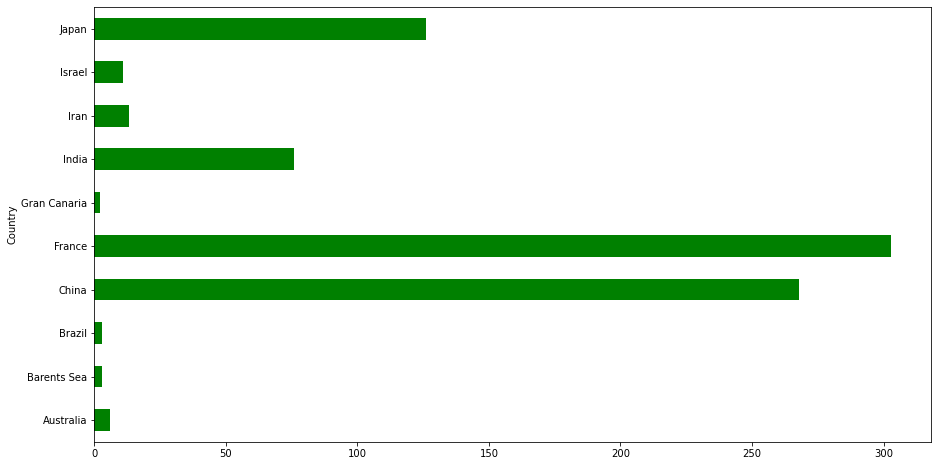

In [19]:
t = missions_df.groupby('Country')['Company Name'].count()[0:10]
t.plot(kind='barh', stacked=False, color=['green'])
plt.gcf().set_size_inches(15,8)

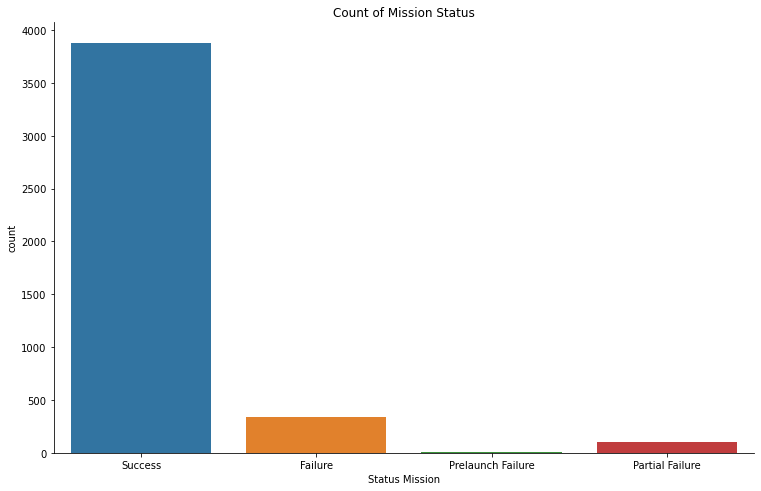

In [20]:
sns.catplot(x='Status Mission', data = missions_df, kind='count')
plt.title('Count of Mission Status')
plt.gcf().set_size_inches(12,7);

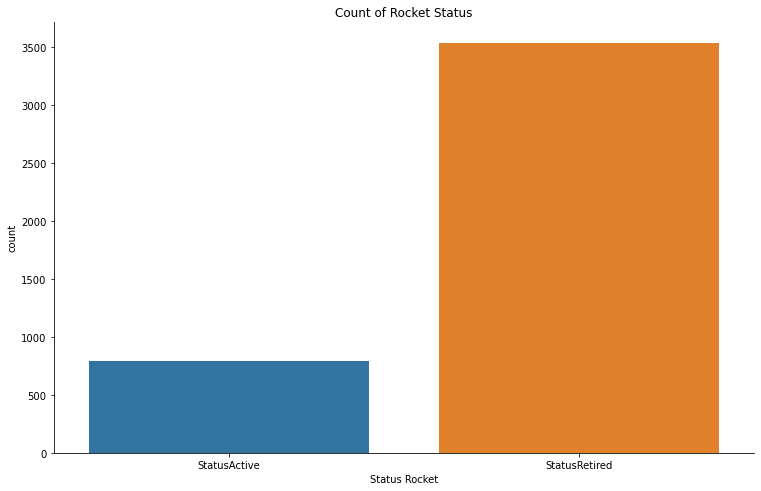

In [21]:
sns.catplot(x='Status Rocket', data = missions_df, kind='count')
plt.title('Count of Rocket Status')
plt.gcf().set_size_inches(12,7);

In [22]:
missions_df['Country'].nunique()

22

In [23]:
missions_df['Cost']

0        50.00
1        29.75
2       153.79
3        65.00
4       145.00
         ...  
4319    153.79
4320    153.79
4321    153.79
4322    153.79
4323    153.79
Name: Cost, Length: 4324, dtype: float64

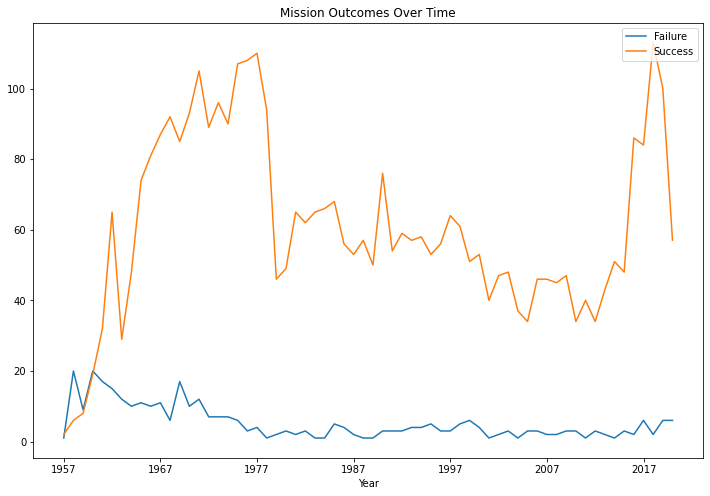

In [24]:
plt.figure(figsize=(12,8))
plt.title('Mission Outcomes Over Time')
missions_df[missions_df['Status Mission'] == 'Failure'].groupby('Year')['Status Mission'].count().plot(kind='line', label = 'Failure')
missions_df[missions_df['Status Mission'] == 'Success'].groupby('Year')['Status Mission'].count().plot(kind='line', label = 'Success')
plt.legend(loc='upper right')
plt.show()

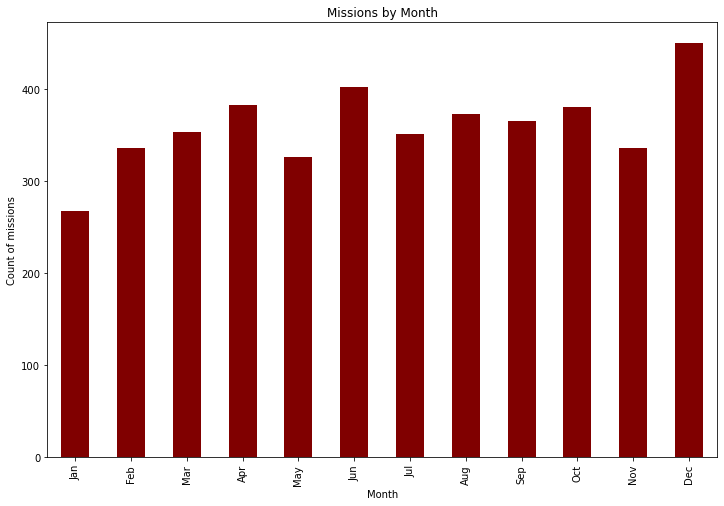

In [25]:
plt.figure(figsize=(12,8))
plt.title('Missions by Month')
plt.xlabel('Month')
plt.ylabel('Count of missions')
month_order = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
missions_df['Month'].value_counts().loc[month_order].plot(kind='bar', color = 'maroon');

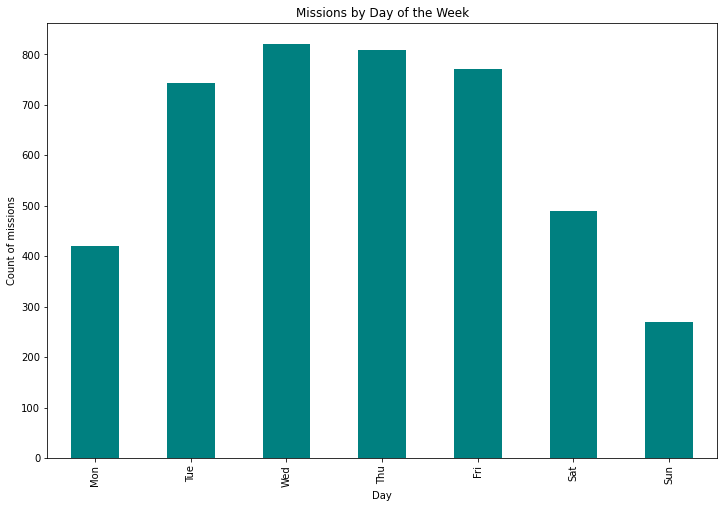

In [26]:
plt.figure(figsize=(12,8))
plt.title('Missions by Day of the Week')
plt.xlabel('Day')
plt.ylabel('Count of missions')
day_order = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
missions_df['Day'].value_counts().loc[day_order].plot(kind='bar', color = 'teal');

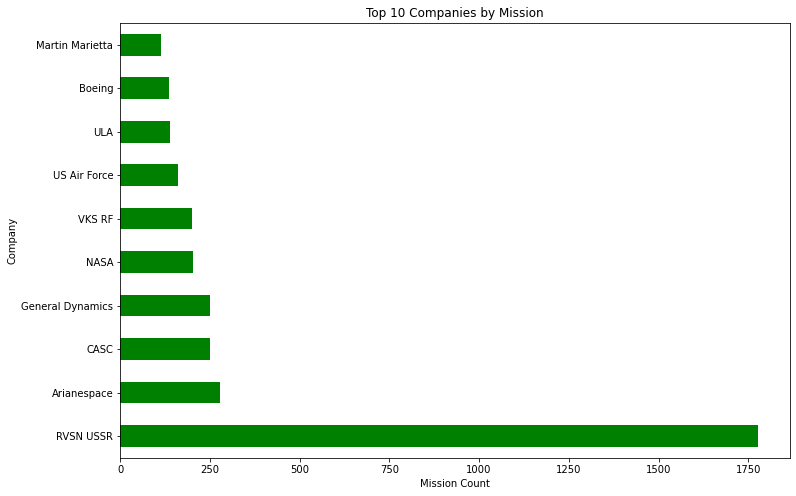

In [27]:
plt.figure(figsize=(12,8))
plt.title('Top 10 Companies by Mission')
plt.xlabel('Mission Count')
plt.ylabel('Company')
missions_df['Company Name'].value_counts().sort_values(ascending = False)[0:10].plot(kind = 'barh', color= 'green');

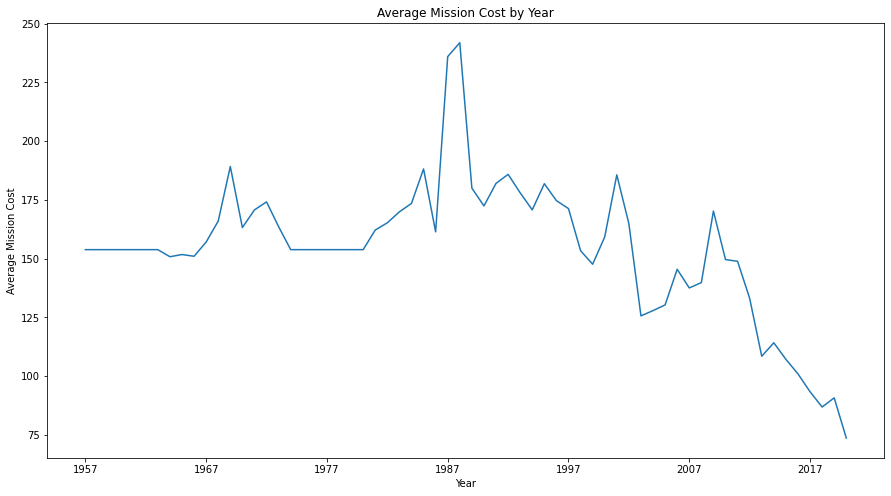

In [28]:
plt.figure(figsize = (15,8))
plt.title('Average Mission Cost by Year')
plt.xlabel('Year')
plt.ylabel('Average Mission Cost')
missions_df.groupby('Year')['Cost'].mean().plot();

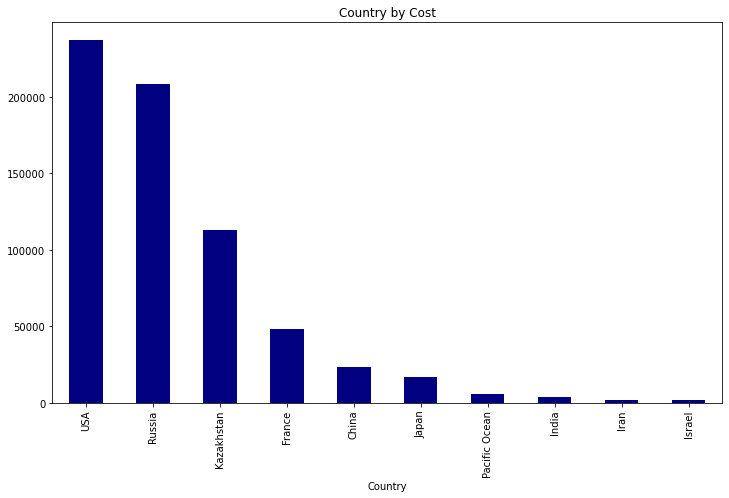

In [29]:
plt.figure(figsize = (12,7)) 
missions_df['Cost'].groupby(missions_df['Country']).sum().sort_values(ascending = False)[0:10].plot(kind='bar', color = 'navy')
plt.title('Country by Cost');

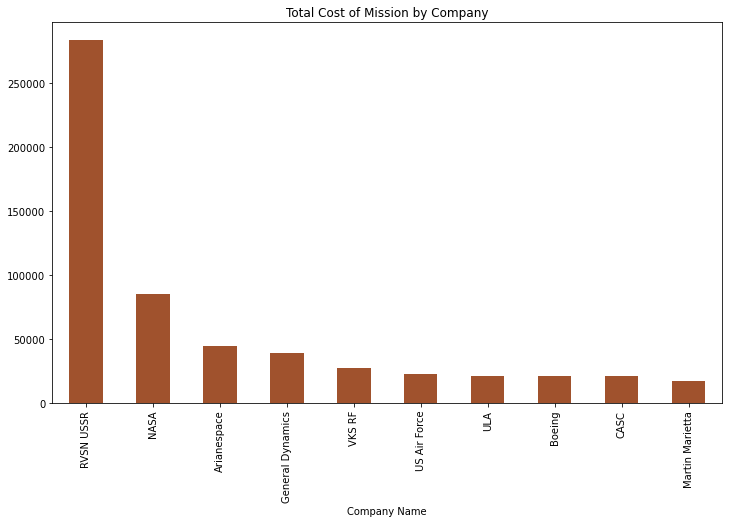

In [30]:
plt.figure(figsize = (12,7)) 
missions_df['Cost'].groupby(missions_df['Company Name']).sum().sort_values(ascending = False)[0:10].plot(kind='bar', color = 'sienna')
plt.title('Total Cost of Mission by Company');

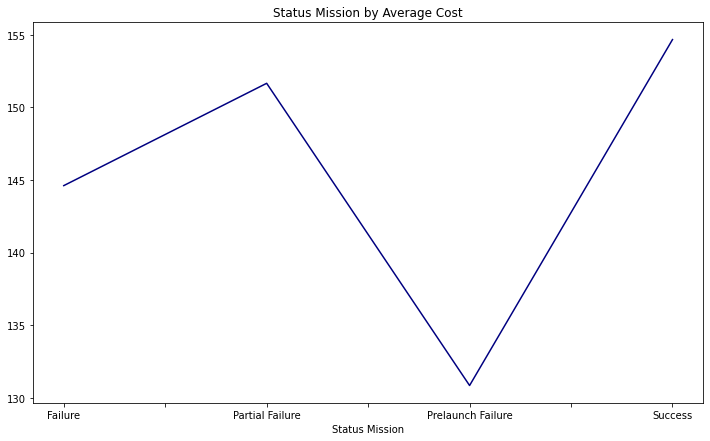

In [31]:
plt.figure(figsize = (12,7)) 
missions_df['Cost'].groupby(missions_df['Status Mission']).mean().plot(kind = 'line', color = 'navy')
plt.title('Status Mission by Average Cost');

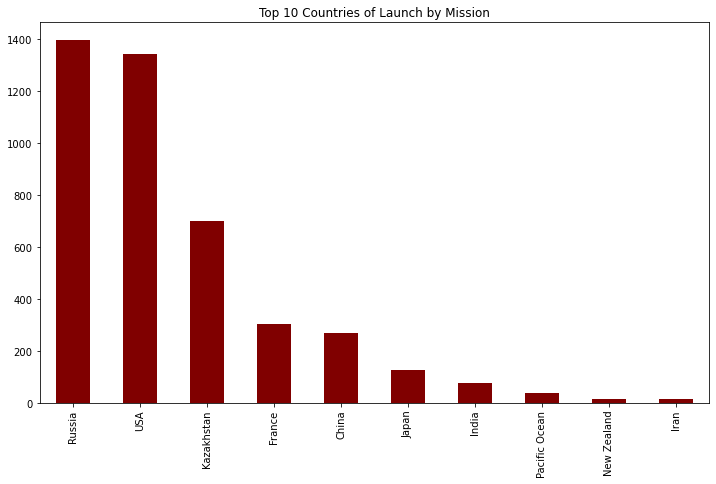

In [32]:
plt.figure(figsize = (12,7)) 
missions_df['Country'].value_counts()[0:10].plot(kind = 'bar', color = 'maroon')
plt.title('Top 10 Countries of Launch by Mission');